In [80]:
import subprocess
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import AlignInfo

In [11]:
myfile = "final/SP-CB21-Bu_S176_L001.assembled-AGCTAGCT-IGH_HUMAN-all_info.csv"
df = pd.read_csv(myfile, sep="\t", na_values=['None', ''])

In [12]:
df.head()

,acc,beforeMID,MID,afterMID,readingframe,cdr3pep,cdr3nuc,cdr3_qual_min,cdr3_qual_max,cdr3_qual_avg,...,V_main,acc:1,nr_v_mains,nr_v_subs,nr_v_alleles,nr_j_subs,nr_j_alleles,acc:2,readingframe:1,nr_sites
0,M02984:396:000000000-BRKRC:1:1101:10034:6768,CTTCTTTAG,AGCTAGCT,CTTAC,4,CARARKYYYDSSGYYPYLDSWGQGTLVT,TGTGCGAGAGCCAGAAAGTATTACTATGATAGTAGCGGTTATTACC...,30,40,39.2,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10034:6768,1,1,1,1,1,M02984:396:000000000-BRKRC:1:1101:10034:6768,4.0,1.0
1,M02984:396:000000000-BRKRC:1:1101:10049:7334,TGTGTTTTT,AGCTAGCT,CTTAC,4,CARDNSGSYGGLWGQGTLVT,TGTGCGAGAGATAATAGCGGGAGCTACGGGGGACTGTGGGGCCAGG...,33,40,39.7,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10049:7334,1,1,1,1,1,NaN,NaN,NaN
2,M02984:396:000000000-BRKRC:1:1101:10095:9536,GATGCGGTA,AGCTAGCT,CTTAC,4,CARAGGYWGQGTLVT,TGTGCGAGAGCAGGCGGCTACTGGGGCCAGGGAACCCTGGTCACC,38,40,39.9,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10095:9536,1,1,1,1,1,NaN,NaN,NaN
3,M02984:396:000000000-BRKRC:1:1101:10097:18678,GGCTTCTCC,AGCTAGCT,CTTAC,4,CARVGDGYSAGMKYWGQRTLVT,TGTGCAAGGGTCGGAGATGGATACAGCGCTGGAATGAAATACTGGG...,38,40,40.0,...,IGHV3,M02984:396:000000000-BRKRC:1:1101:10097:18678,1,1,1,1,1,NaN,NaN,NaN
4,M02984:396:000000000-BRKRC:1:1101:10113:3277,TTGCGTTTA,AGCTAGCT,CTTAC,4,CATSIAARYYYGMDVWGQGTTVT,TGTGCGACTAGTATAGCAGCTCGCTACTACTACGGTATGGACGTCT...,38,40,39.7,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10113:3277,1,1,1,1,1,NaN,NaN,NaN


In [13]:
df.columns

Index(['acc', 'beforeMID', 'MID', 'afterMID', 'readingframe', 'cdr3pep',
       'cdr3nuc', 'cdr3_qual_min', 'cdr3_qual_max', 'cdr3_qual_avg',
       'cdr3_qual', 'nt_start', 'nt_end', 'seq_length', 'V_flag', 'V_gene',
       'J_flag', 'J_gene', 'readingframe_seq', 'seq', 'pep', 'qual', 'V_sub',
       'J_sub', 'V_main', 'acc:1', 'nr_v_mains', 'nr_v_subs', 'nr_v_alleles',
       'nr_j_subs', 'nr_j_alleles', 'acc:2', 'readingframe:1', 'nr_sites'],
      dtype='object')

In [30]:
cols = ['beforeMID', 'cdr3pep', 'acc']
agg_umi = df[cols].groupby(['beforeMID','cdr3pep']).agg('nunique')

In [32]:
agg_umi = agg_umi.sort_values(by='acc', ascending=False)
agg_umi.head()

,,beforeMID,cdr3pep,acc
beforeMID,cdr3pep,,,
GTGAATTAG,CARTYCSSSNRCYDYWGQGTLVT,1,1,5
GGCTACCAT,CARDYGNGFDYWGQGTLVT,1,1,5
ATTGGCTTT,CARDLETDYYDSSDVFDIWGQGTMVT,1,1,4
CTTCCACGG,CARLLDYGDYRRLLGQGTLVT,1,1,4
CCTACCCTA,CASDIKWNFDSWGQGTLVT,1,1,4


(array([3.926e+04, 0.000e+00, 3.472e+03, 0.000e+00, 0.000e+00, 3.410e+02,
        0.000e+00, 1.900e+01, 0.000e+00, 2.000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

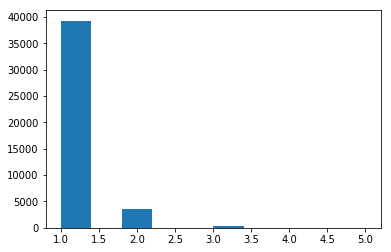

In [34]:
plt.hist(agg_umi['acc'])

In [36]:
len(agg_umi.loc[agg_umi['acc'] > 1])

3834

In [50]:
cols = ['acc', 'seq']
check = df.loc[(df['beforeMID']=='GTGAATTAG') & (df['cdr3pep']=='CARTYCSSSNRCYDYWGQGTLVT')][cols]

In [54]:
check

,acc,seq
25639,M02984:396:000000000-BRKRC:1:2101:28441:10076,ATCTAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...
26643,M02984:396:000000000-BRKRC:1:2102:2307:14244,AAGAAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...
27497,M02984:396:000000000-BRKRC:1:2103:15880:18782,ACTCAGCTAGCTCGTATCGCCTCCCTCGCGTCAGTGAATTAGCTTA...
36615,M02984:396:000000000-BRKRC:1:2110:29197:12107,TGGTAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...
44577,M02984:396:000000000-BRKRC:1:2117:15208:22531,ACTCAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...


In [63]:
sequences = list()
for index, row in check.iterrows():
    sr = SeqRecord(Seq(row['seq']), row['acc'], '', '')
    sequences.append(sr)

In [64]:
SeqIO.write(sequences, "example.fasta", "fasta")

5

In [67]:
def multipleSequenceAlignment(fastafile):
    '''
    Description: perform multiple sequence alignment and trim ends to make sequences of same size
    In: fasta file name
    Out: clustal (fasta) file name
    '''
    clustalfile = fastafile + ".clustal.fasta"
    cmd = ["./clustalo", "--force", "-i", fastafile, "-o", clustalfile]
    rc = subprocess.call(cmd)
    if rc != 0:
        sys.exit("something went wrong with: " + " ".join(cmd))
    return(clustalfile)

In [68]:
clustalFile = multipleSequenceAlignment("example.fasta")

In [69]:
clustalFile

'example.fasta.clustal.fasta'

In [91]:
msa = AlignIO.read(clustalFile, "fasta")
summary_align = AlignInfo.SummaryInfo(msa)

In [92]:
consensus = summary_align.dumb_consensus()

In [93]:
my_pssm = summary_align.pos_specific_score_matrix(consensus, chars_to_ignore = ['N'])

In [99]:
print(consensus)

AXXXAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGAGACGGTGACCAGGGTTCCCTGGCCCCAGTAGTCGTAGCATCTGTTACTACTACTACAATATGTTCTCGCACAGTAATACACAGCCATGTCCTCAGCTCTCAGGCTGCCCATTTGAAGATACAGCGTGTTCTTGGAATTGTCTCTGGAGATGGTGAATCTGCCCTTCACAGAGTTTGCATAATATGTGCTACCCCCATTACTAXTAATAGCTGAXAXATATTCCXGTCCCTTCCCTGGAGCCTGGCGGACCCAGTXCATXXCATAGCTXCTGAAXGTGAAXCCAGAGGCTGCACAGGAGAGT


In [98]:
print(my_pssm)

    A   C   G   T
A  4.0 0.0 0.0 1.0
X  1.0 2.0 1.0 1.0
X  0.0 1.0 2.0 2.0
X  1.0 2.0 0.0 2.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 4.0 0.0 1.0
C  0.0 5.0 0.0 0.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
T  0.0 0.0 0.0 5.0
G  0.0 0.0 5.0 0.0
A  5.0 0.0 0.0 0.0
A  5.0 0.0 0.0 0.0
T  0.0 0.0 0.0 5.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
G  0.0 0.0 5.0 0.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.

## TO DO NEXT: get majority consensus